In [1]:
install.packages("pracma")
library('igraph')
library('Matrix')
library('pracma')


The downloaded binary packages are in
	/var/folders/b7/grfm49hs3pj1mk3y7stdkdnw0000gn/T//Rtmp6soHuX/downloaded_packages



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

### Transition Matrix for an Undirected Network


In [3]:
set.seed(1)
g = erdos.renyi.game(n=1000,p=0.01,directed=F)

### Transition Matrix for a Directed Network

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

[1] 5


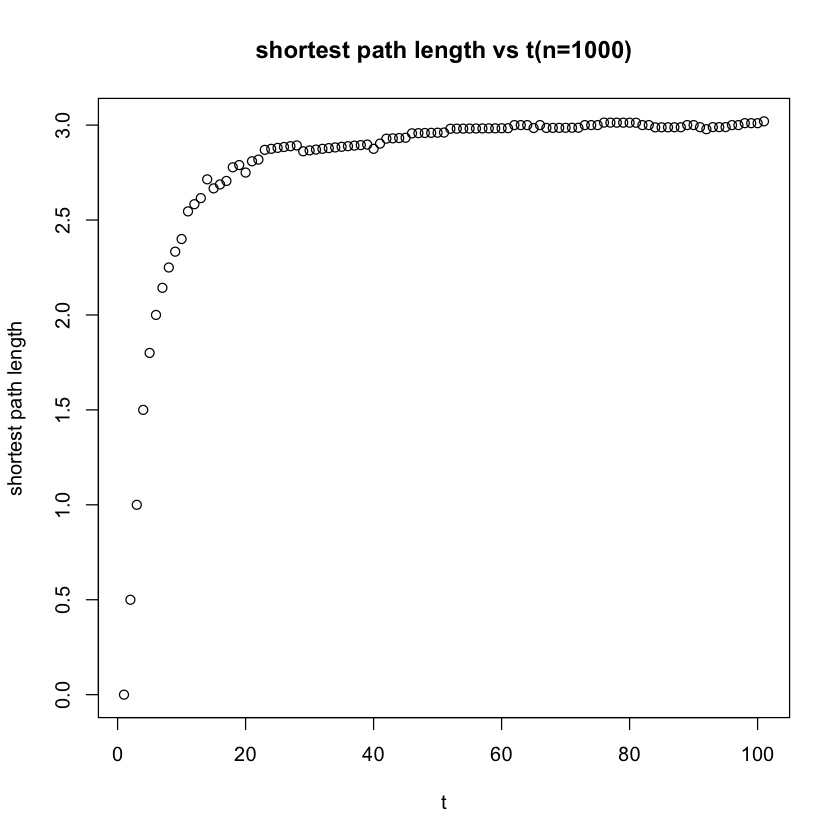

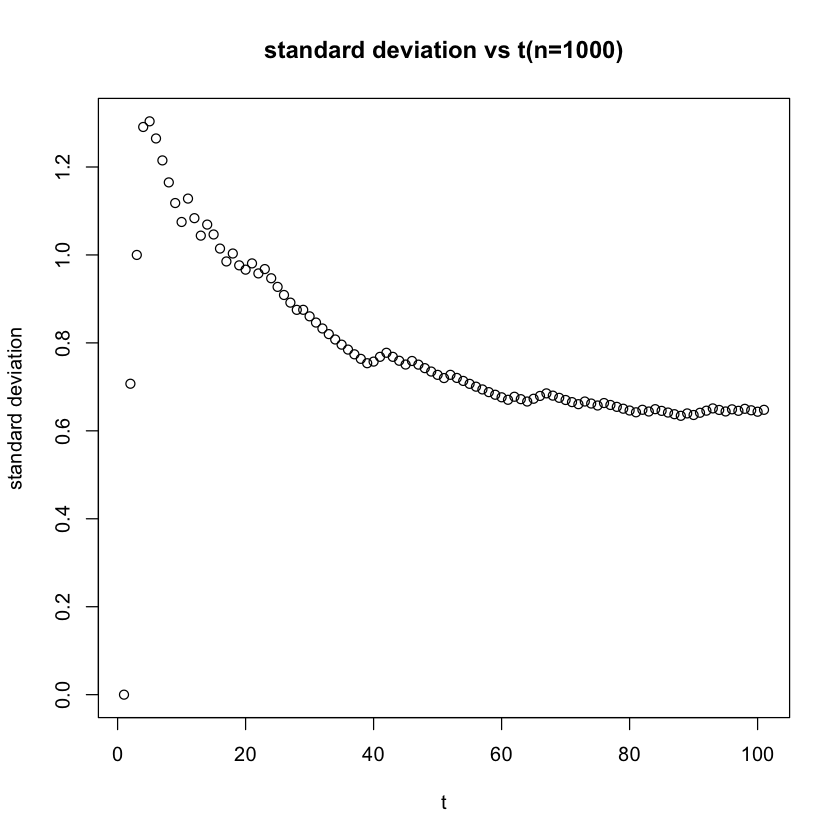

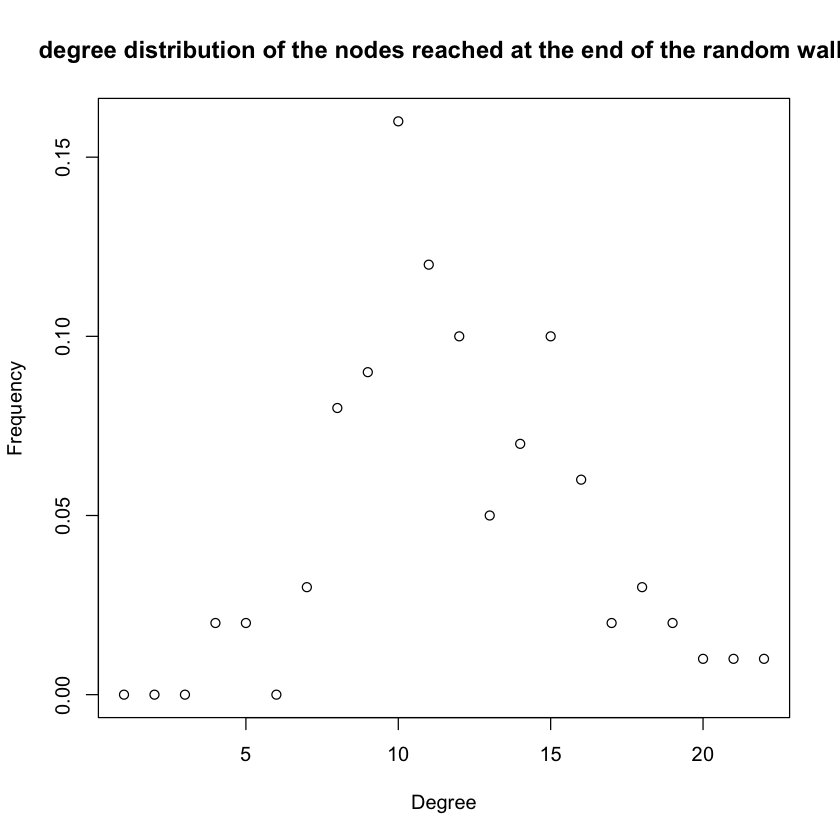

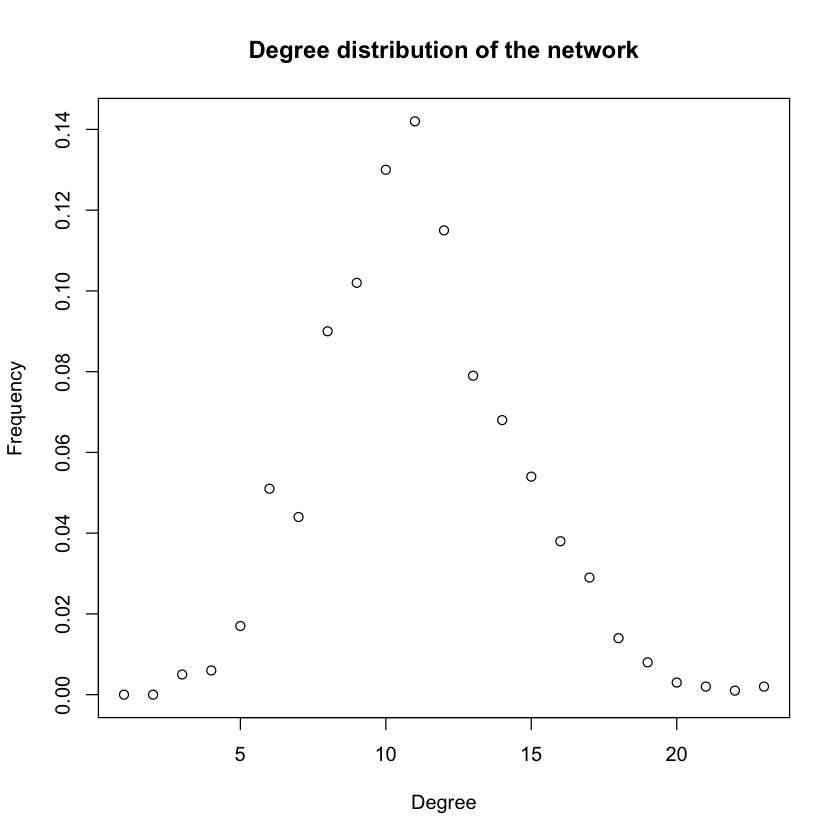

In [5]:
set.seed(1)
start_node = 100
print(diameter(g))

value = average_distance=standard_deviation =node_degree =0

for (steps in 1:100) {
    v_last = random_walk(g, steps, start_node)
    shortpath = shortest.paths(g, start_node, v_last)
    value <- c(value, shortpath)
    average_distance <- c(average_distance, mean(value))
    standard_deviation <- c(standard_deviation, sd(value))
    node_degree <- c(node_degree, degree(g, v_last))
}

allcount <- numeric(0)
for(j in 1:max(node_degree)){
    count<-0
    for(i in node_degree){
        if(i == j){
            count = count+1
        }
        
    }
    count=count/100
    allcount <- c(allcount, count)
}
plot(average_distance,main="shortest path length vs t(n=1000)",xlab="t",ylab="shortest path length")
plot(standard_deviation,main="standard deviation vs t(n=1000)",xlab="t",ylab="standard deviation")
plot(allcount,main="degree distribution of the nodes reached at the end of the random walk",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")

[1] 6


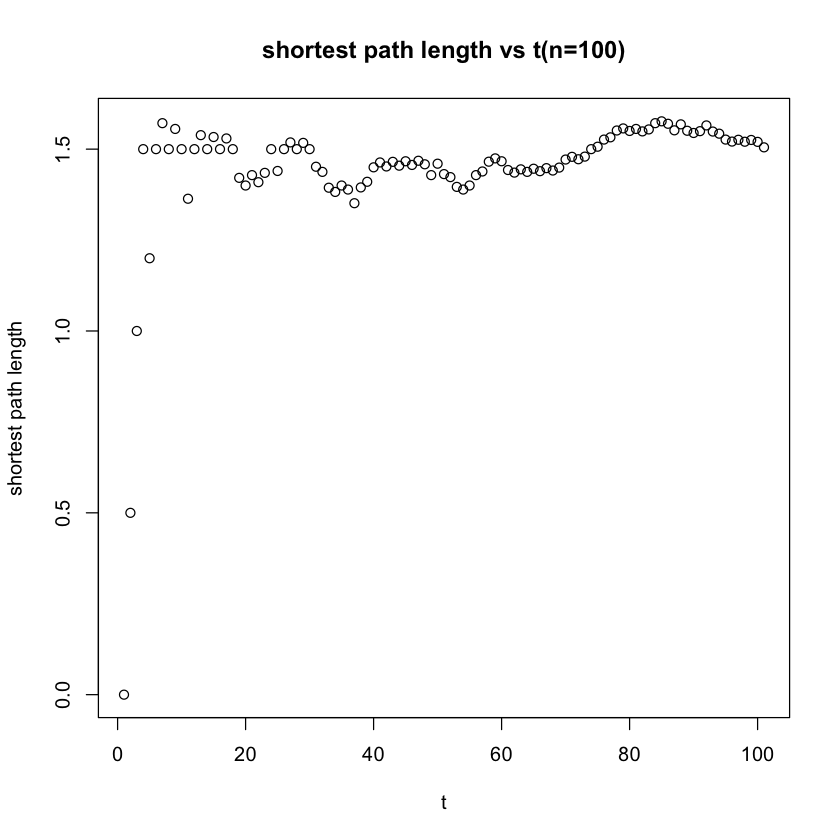

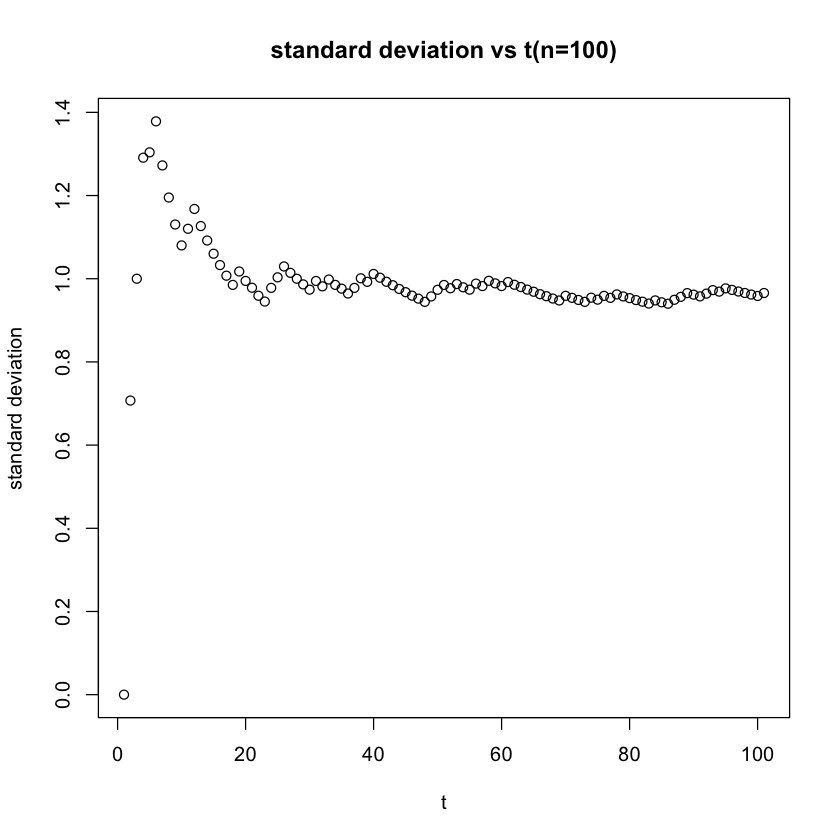

In [6]:
#node=100
set.seed(2)
g = erdos.renyi.game(n=100,p=0.01,directed=F)
print(diameter(g))

start_node = 10

value = average_distance=standard_deviation =node_degree =0

for (steps in 1:100) {
    v_last = random_walk(g, steps, start_node)
    shortpath = shortest.paths(g, start_node, v_last)
    value <- c(value, shortpath)
    average_distance <- c(average_distance, mean(value))
    standard_deviation <- c(standard_deviation, sd(value))
    node_degree <- c(node_degree, degree(g, v_last))
}

allcount <- numeric(0)
for(j in 1:max(node_degree)){
    count<-0
    for(i in node_degree){
        if(i == j){
            count = count+1
        }
        
    }
    count=count/100
    allcount <- c(allcount, count)
}
plot(average_distance,main="shortest path length vs t(n=100)",xlab="t",ylab="shortest path length")
plot(standard_deviation,main="standard deviation vs t(n=100)",xlab="t",ylab="standard deviation")




In [ ]:
#node=10000
set.seed(3)
g = erdos.renyi.game(n=10000,p=0.01,directed=F)
print(diameter(g))

start_node = 10

value = average_distance=standard_deviation =node_degree =0

for (steps in 1:100) {
    v_last = random_walk(g, steps, start_node)
    shortpath = shortest.paths(g, start_node, v_last)
    value <- c(value, shortpath)
    average_distance <- c(average_distance, mean(value))
    standard_deviation <- c(standard_deviation, sd(value))
    node_degree <- c(node_degree, degree(g, v_last))
}

allcount <- numeric(0)
for(j in 1:max(node_degree)){
    count<-0
    for(i in node_degree){
        if(i == j){
            count = count+1
        }
        
    }
    count=count/100
    allcount <- c(allcount, count)
}
plot(average_distance,main="shortest path length vs t(n=10000)",xlab="t",ylab="shortest path length")
plot(standard_deviation,main="standard deviation vs t(n=10000)",xlab="t",ylab="standard deviation")
